In [2]:
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/compuworks/anaconda3/lib/python3.7/site-packages/tensorflo

In [3]:
# 오리지날 데이터셋
original_dataset_dir = './train'

# 소규모 데이터셋
base_dir = './cats_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

# 훈련,검증,테스트 분할 디렉토리

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수: ', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수: ', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수: ', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수: ', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수:  500
검증용 강아지 이미지 전체 개수:  500
테스트용 고양이 이미지 전체 개수:  500
테스트용 강아지 이미지 전체 개수:  500


In [6]:
# # 전처리

# # ImageGenerateor - 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어주는 파이썬 제너레이터를 만들어 준다.

# # 모든 이미지를 1/255로 스케일을 조정 - 기존 방식, 과적합 발생
# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # 타깃 디렉터리
#         train_dir,
#         # 모든 이미지를 150 × 150 크기로
#         target_size=(150, 150),
#         batch_size=20,
#         # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요하다
#         class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='binary')



# 데이터 증식  -  부족한 데이터를 늘리는 방법

# 모든 이미지를 1/255로 스케일을 조정
# 검증 데이터는 증식되어서는 안 됩니다! --- 중요
test_datagen = ImageDataGenerator(rescale=1./255)

# 증식된 학습 데이터, 각도, 배율, 수직 수평 위치 등을 조절하여 한 사진을 여러 데이터로 활용가능하도록
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [5]:
# 네트워크
# 드롭아웃 레이어 - 과적합 방지

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
________________________________________________

In [6]:
# 학습

# fit_generator 메서드는 fit 메서드와 동일하지만 데이터 제너레이터를 사용할 수 있다는 차이가 있다. 
# 이 메서드는 첫 번째 매개변수로 입력과 타깃의 배치를 끝없이 반환하는 파이썬 제너레이터를 받는다.

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 23s 234ms/step - loss: 0.6932 - acc: 0.5240 - val_loss: 0.6763 - val_acc: 0.5577
Epoch 2/100
100/100 [==============================] - 21s 213ms/step - loss: 0.6791 - acc: 0.5612 - val_loss: 0.7026 - val_acc: 0.6031
Epoch 3/100
100/100 [==============================] - 21s 215ms/step - loss: 0.6623 - acc: 0.5906 - val_loss: 0.8296 - val_acc: 0.5476
Epoch 4/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6490 - acc: 0.6106 - val_loss: 0.6633 - val_acc: 0.6256
Epoch 5/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6293 - acc: 0.6449 - val_loss: 0.6494 - val_acc: 0.6402
Epoch 6/100
100/100 [==============================] - 23s 230ms/step - loss: 0.6096 - acc: 0.6578 - val_loss: 0.4937 - val_acc: 0.6791
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.6065 - acc: 0.6699 - val_loss: 0.5023 - val_acc: 0.7119


Epoch 59/100
100/100 [==============================] - 21s 214ms/step - loss: 0.4058 - acc: 0.8128 - val_loss: 0.6358 - val_acc: 0.8086
Epoch 60/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4102 - acc: 0.8009 - val_loss: 0.2948 - val_acc: 0.8204
Epoch 61/100
100/100 [==============================] - 22s 216ms/step - loss: 0.4153 - acc: 0.8109 - val_loss: 0.3505 - val_acc: 0.8093
Epoch 62/100
100/100 [==============================] - 21s 212ms/step - loss: 0.4071 - acc: 0.8154 - val_loss: 0.2911 - val_acc: 0.8103
Epoch 63/100
100/100 [==============================] - 22s 219ms/step - loss: 0.4032 - acc: 0.8134 - val_loss: 0.4197 - val_acc: 0.8080
Epoch 64/100
100/100 [==============================] - 21s 211ms/step - loss: 0.4010 - acc: 0.8147 - val_loss: 0.4674 - val_acc: 0.8144
Epoch 65/100
100/100 [==============================] - 21s 210ms/step - loss: 0.4050 - acc: 0.8119 - val_loss: 0.2598 - val_acc: 0.7824
Epoch 66/100
100/100 [===================

In [7]:
# 학습된 모델 저장

# model.save('./cats_and_dogs_small_1.h5')
model.save('cats_and_dogs_small_2.h5')

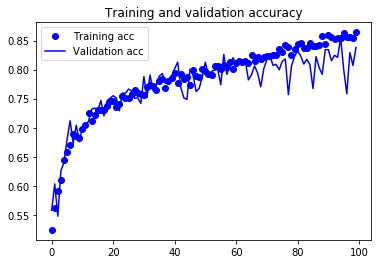

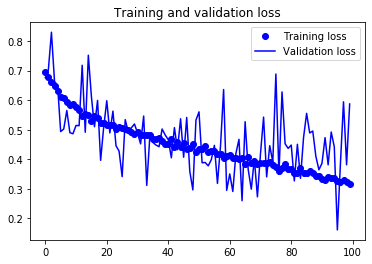

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()